In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
only_zeroes = X_train[y_train == 0]

In [10]:
only_zeroes.shape

(5923, 28, 28)

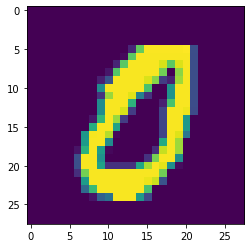

In [11]:
plt.imshow(only_zeroes[10])

In [16]:
only_zeroes = only_zeroes/255

In [17]:
only_zeroes = only_zeroes.reshape(-1, 28, 28, 1) * 2. - 1.

In [18]:
only_zeroes.min()

-1.0

In [19]:
only_zeroes.max()

1.0

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Dropout, LeakyReLU, Flatten, BatchNormalization, Conv2D, Conv2DTranspose

In [21]:
np.random.seed(42)
tf.random.set_seed(42)
codings_size = 100

In [27]:
generator = Sequential()

generator.add(Dense(7 * 7 * 128, input_shape=[codings_size]))
generator.add(Reshape([7, 7, 128]))

generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation='relu'))

generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation='tanh'))

In [25]:
discriminator = Sequential()

discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same", activation=LeakyReLU(0.3), input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))

discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same", activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))

discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [28]:
GAN = Sequential([generator, discriminator])

In [29]:
discriminator.trainable = False

In [30]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [31]:
GAN.layers[0].summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6272)              633472    
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 64)       204864    
 ranspose)                                                       
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                      

In [32]:
GAN.layers[1].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6273      
                                                                 
Total params: 212,865
Trainable params: 0
Non-trainabl